In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
df = pd.read_csv('dsa210_merged_data.csv')
print("Data loaded successfully.\n")


Data loaded successfully.



--- Hypothesis 1 ---
Correlation: 0.2033, P-value: 0.0060



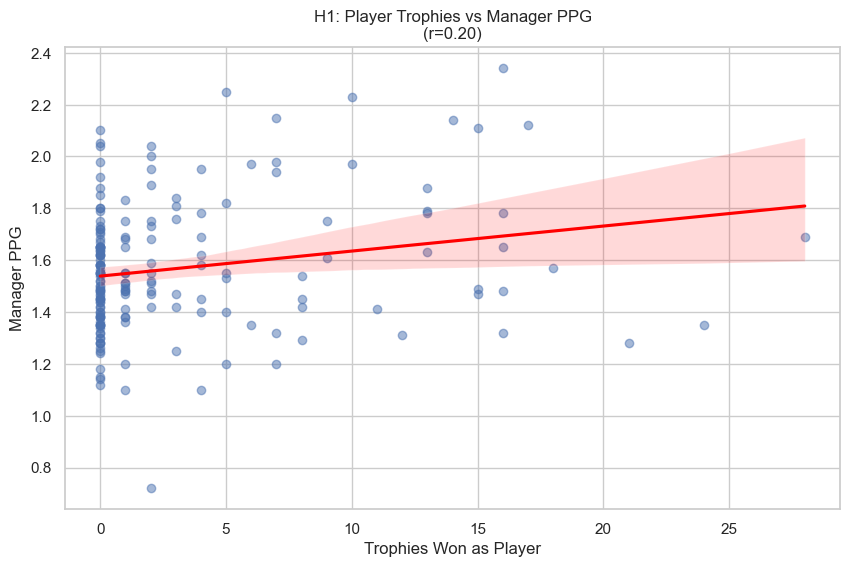

In [3]:
print("--- Hypothesis 1 ---")
df['Player_Trophies'] = pd.to_numeric(df['Trophies Won'], errors='coerce').fillna(0)
df['Manager_PPG'] = pd.to_numeric(df['PPG All Time'], errors='coerce')
h1_data = df.dropna(subset=['Player_Trophies', 'Manager_PPG'])
corr_h1, p_h1 = stats.pearsonr(h1_data['Player_Trophies'], h1_data['Manager_PPG'])
print(f"Correlation: {corr_h1:.4f}, P-value: {p_h1:.4f}\n")

plt.figure(figsize=(10, 6))
sns.regplot(x='Player_Trophies', y='Manager_PPG', data=h1_data, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'H1: Player Trophies vs Manager PPG\n(r={corr_h1:.2f})')
plt.xlabel('Trophies Won as Player')
plt.ylabel('Manager PPG')
plt.savefig('h1_visual.png')
plt.show()


--- Hypothesis 2 ---
Correlation: 0.2654, P-value: 0.0003



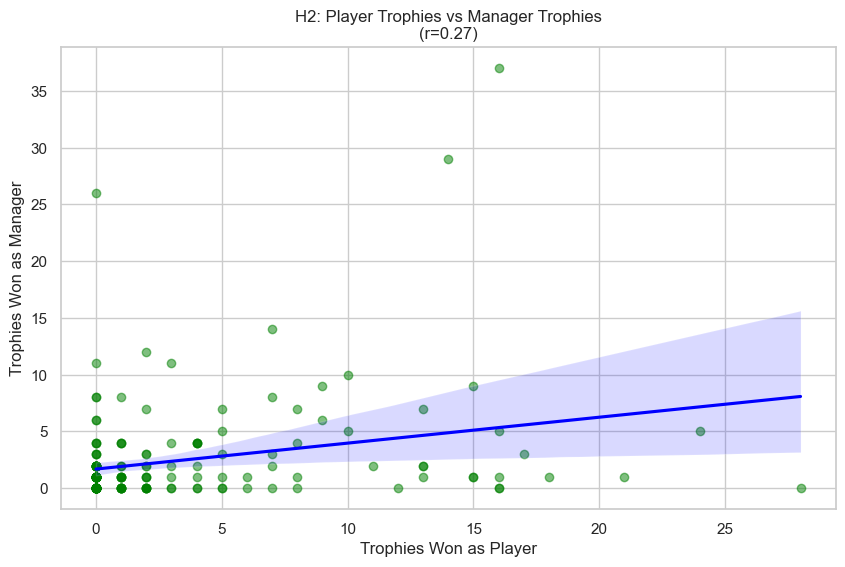

In [4]:
print("--- Hypothesis 2 ---")
df['Manager_Trophies'] = pd.to_numeric(df['Trophies'], errors='coerce').fillna(0)
h2_data = df[['Player_Trophies', 'Manager_Trophies']].dropna()

corr_h2, p_h2 = stats.pearsonr(h2_data['Player_Trophies'], h2_data['Manager_Trophies'])
print(f"Correlation: {corr_h2:.4f}, P-value: {p_h2:.4f}\n")

plt.figure(figsize=(10, 6))
sns.regplot(x='Player_Trophies', y='Manager_Trophies', data=h2_data, 
            scatter_kws={'alpha':0.5, 'color': 'green'}, line_kws={'color':'blue'})
plt.title(f'H2: Player Trophies vs Manager Trophies\n(r={corr_h2:.2f})')
plt.xlabel('Trophies Won as Player')
plt.ylabel('Trophies Won as Manager')
plt.savefig('h2_visual.png')
plt.show()


--- Hypothesis 3 ---
Midfielders vs Others P-value: 0.0032



/var/folders/24/4cwnjg9s0kx759_mcckj65qw0000gn/T/ipykernel_13638/424622025.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='General Position', y='Manager_PPG', data=h3_data, order=order, palette='viridis')


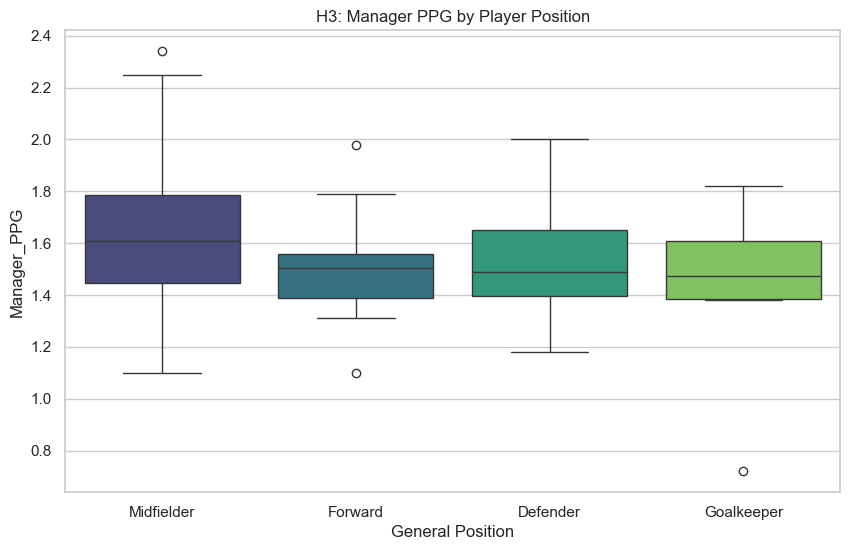

In [5]:
print("--- Hypothesis 3 ---")
h3_data = df[df['General Position'].isin(['Midfielder', 'Defender', 'Forward', 'Goalkeeper'])].dropna(subset=['Manager_PPG'])
midfielders = h3_data[h3_data['General Position'] == 'Midfielder']['Manager_PPG']
others = h3_data[h3_data['General Position'] != 'Midfielder']['Manager_PPG']
t_stat, p_val_ttest = stats.ttest_ind(midfielders, others)
print(f"Midfielders vs Others P-value: {p_val_ttest:.4f}\n")

plt.figure(figsize=(10, 6))
order = h3_data.groupby('General Position')['Manager_PPG'].median().sort_values(ascending=False).index
sns.boxplot(x='General Position', y='Manager_PPG', data=h3_data, order=order, palette='viridis')
plt.title(f'H3: Manager PPG by Player Position')
plt.savefig('h3_visual.png')
plt.show()

--- Hypothesis 4 ---
ANOVA P-value: 0.0564



/var/folders/24/4cwnjg9s0kx759_mcckj65qw0000gn/T/ipykernel_13638/3782931243.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='League Name', y='Manager_PPG', data=df_filtered, order=order_h4, palette='viridis')


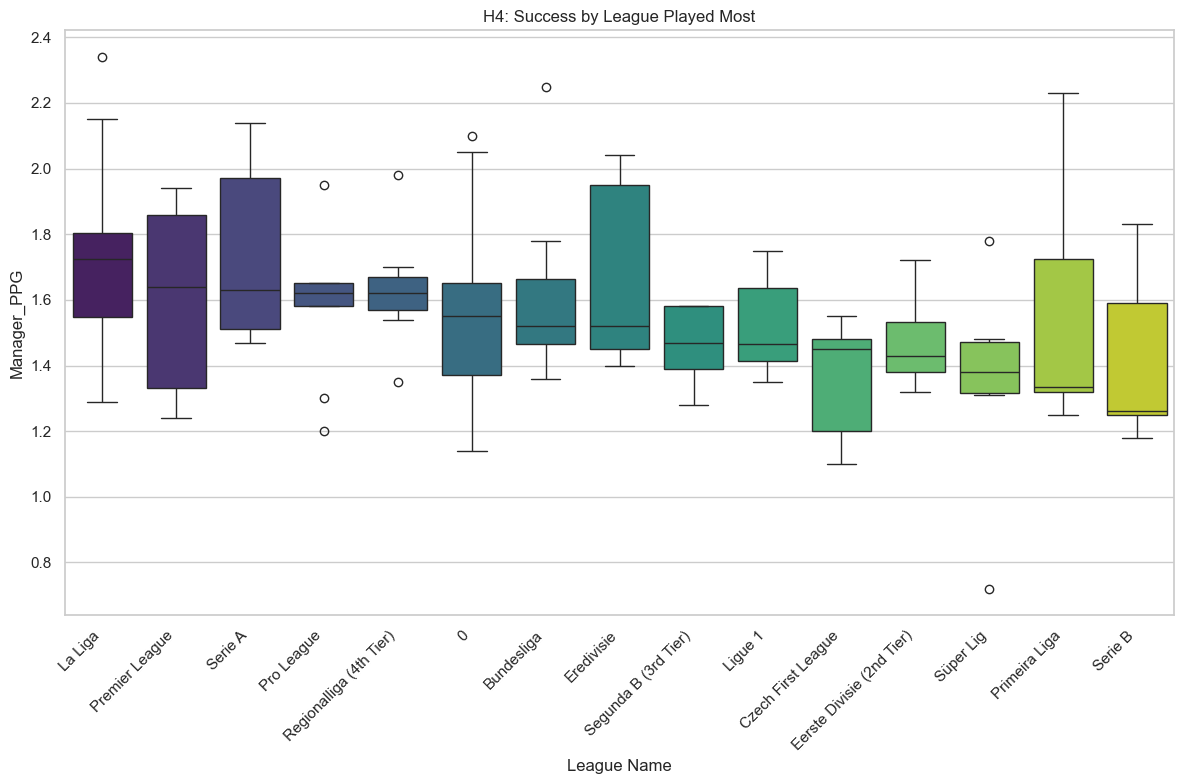

In [6]:
print("--- Hypothesis 4 ---")
df = df.dropna(subset=['League Played Most', 'Manager_PPG'])
df['League Name'] = df['League Played Most'].astype(str)
league_counts = df['League Name'].value_counts()
valid_leagues = league_counts[league_counts >= 5].index
df_filtered = df[df['League Name'].isin(valid_leagues)]

groups = [df_filtered[df_filtered['League Name'] == league]['Manager_PPG'] for league in valid_leagues]
f_stat, p_h4 = stats.f_oneway(*groups)
print(f"ANOVA P-value: {p_h4:.4f}\n")

plt.figure(figsize=(12, 8))
order_h4 = df_filtered.groupby('League Name')['Manager_PPG'].median().sort_values(ascending=False).index
sns.boxplot(x='League Name', y='Manager_PPG', data=df_filtered, order=order_h4, palette='viridis')
plt.title(f'H4: Success by League Played Most')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('h4_visual.png')
plt.show()


--- Hypothesis 5 ---
Correlation: -0.0624, P-value: 0.4041



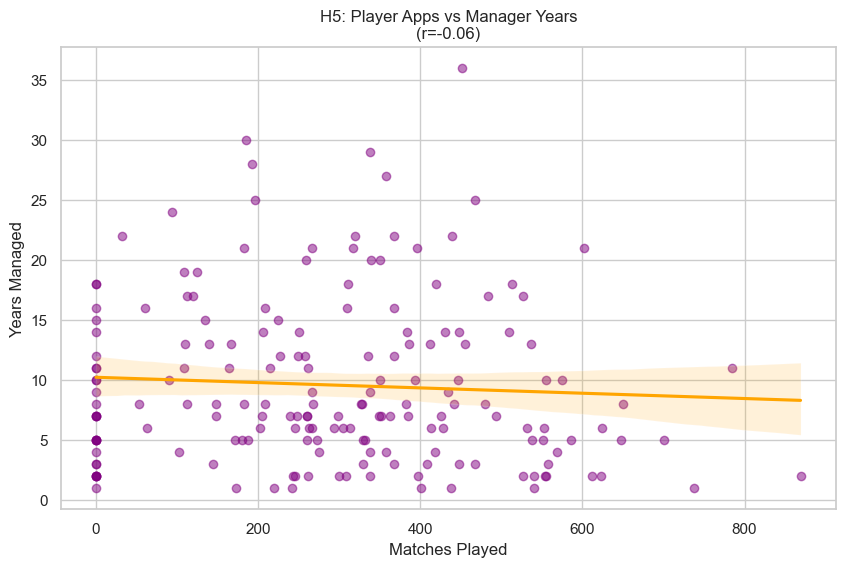

In [7]:

print("--- Hypothesis 5 ---")
df['Player_Apps'] = pd.to_numeric(df['Apps'], errors='coerce')
df['Manager_Years'] = pd.to_numeric(df['Total Years'], errors='coerce')
h5_data = df.dropna(subset=['Player_Apps', 'Manager_Years'])

corr_h5, p_h5 = stats.pearsonr(h5_data['Player_Apps'], h5_data['Manager_Years'])
print(f"Correlation: {corr_h5:.4f}, P-value: {p_h5:.4f}\n")

plt.figure(figsize=(10, 6))
sns.regplot(x='Player_Apps', y='Manager_Years', data=h5_data, 
            scatter_kws={'alpha':0.5, 'color': 'purple'}, line_kws={'color':'orange'})
plt.title(f'H5: Player Apps vs Manager Years\n(r={corr_h5:.2f})')
plt.xlabel('Matches Played')
plt.ylabel('Years Managed')
plt.savefig('h5_visual.png')
plt.show()




--- Hypothesis 6 ---
Correlation: -0.0825, P-value: 0.2696



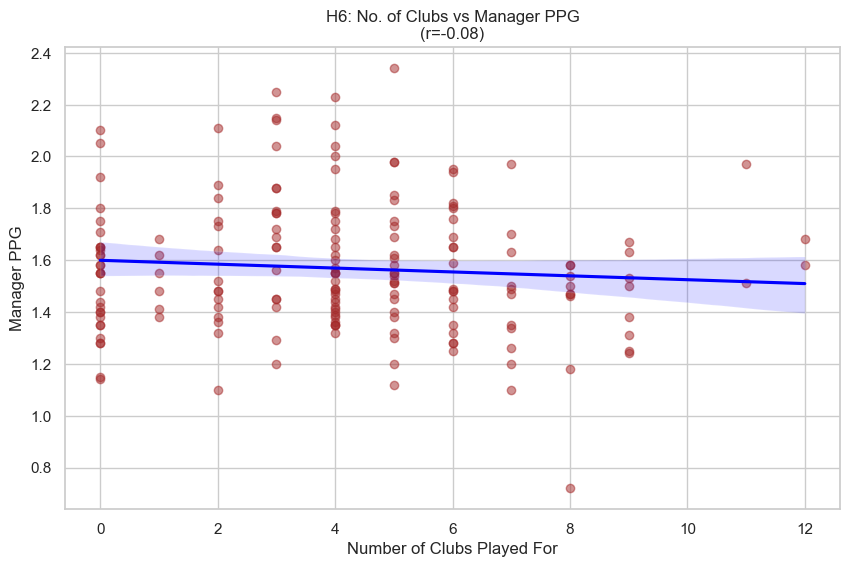

In [8]:
print("--- Hypothesis 6 ---")
df['Player_Clubs_Count'] = pd.to_numeric(df['No. of Clubs'], errors='coerce')
h6_data = df.dropna(subset=['Player_Clubs_Count', 'Manager_PPG'])

corr_h6, p_h6 = stats.pearsonr(h6_data['Player_Clubs_Count'], h6_data['Manager_PPG'])
print(f"Correlation: {corr_h6:.4f}, P-value: {p_h6:.4f}\n")


plt.figure(figsize=(10, 6))
sns.regplot(x='Player_Clubs_Count', y='Manager_PPG', data=h6_data, 
            scatter_kws={'alpha':0.5, 'color': 'brown'}, line_kws={'color':'blue'})
plt.title(f'H6: No. of Clubs vs Manager PPG\n(r={corr_h6:.2f})')
plt.xlabel('Number of Clubs Played For')
plt.ylabel('Manager PPG')
plt.savefig('h6_visual.png')
plt.show()
